In [2]:
import zipfile
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import zoom

# Visualizing a sample

data/128x256_160_S1/0900.bmp
(128, 256) uint8


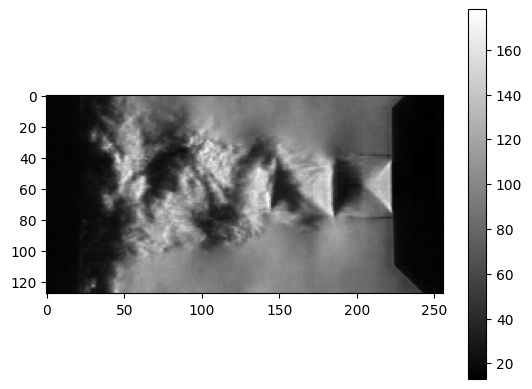

In [2]:
i=900
filename = f'data/128x256_160_S1/{i:04d}.bmp'
print(filename)
img = Image.open(filename)
img_array = np.array(img)
print(img_array.shape, img_array.dtype)
plt.imshow(img_array, cmap="gray")
plt.colorbar()
plt.show()

# Preparing the HR dataset

In [3]:
data_ls = []
for i in range(1000):
    filename = f'data/128x256_160_S1/{i:04d}.bmp'
    print(f"i: {i}, filename: {filename}")
    img = Image.open(filename)
    img_array = np.array(img)
    img_array = np.expand_dims(img_array, axis=0)
    data_ls.append(img_array)

data = np.concatenate(data_ls, axis=0)



i: 0, filename: data/128x256_160_S1/0000.bmp
i: 1, filename: data/128x256_160_S1/0001.bmp
i: 2, filename: data/128x256_160_S1/0002.bmp
i: 3, filename: data/128x256_160_S1/0003.bmp
i: 4, filename: data/128x256_160_S1/0004.bmp
i: 5, filename: data/128x256_160_S1/0005.bmp
i: 6, filename: data/128x256_160_S1/0006.bmp
i: 7, filename: data/128x256_160_S1/0007.bmp
i: 8, filename: data/128x256_160_S1/0008.bmp
i: 9, filename: data/128x256_160_S1/0009.bmp
i: 10, filename: data/128x256_160_S1/0010.bmp
i: 11, filename: data/128x256_160_S1/0011.bmp
i: 12, filename: data/128x256_160_S1/0012.bmp
i: 13, filename: data/128x256_160_S1/0013.bmp
i: 14, filename: data/128x256_160_S1/0014.bmp
i: 15, filename: data/128x256_160_S1/0015.bmp
i: 16, filename: data/128x256_160_S1/0016.bmp
i: 17, filename: data/128x256_160_S1/0017.bmp
i: 18, filename: data/128x256_160_S1/0018.bmp
i: 19, filename: data/128x256_160_S1/0019.bmp
i: 20, filename: data/128x256_160_S1/0020.bmp
i: 21, filename: data/128x256_160_S1/0021.bm

In [4]:
data.shape

(1000, 128, 256)

In [5]:
hr_data = data.astype(np.float32)
print(f"hr_data: {hr_data.shape}")
np.save("hr_data.npy", hr_data)


hr_data: (1000, 128, 256)


# Preparing the LR dataset
## Subsampling + Interpolation (to have same shape as HR data)

In [ ]:
def smoothen(x, k):
    """
    Downsamples and then upsamples a collection of 2D array [nt, nx, ny] using bicubic interpolation.
    This function only downsamples in space. 
    Temporal downsampling is done inside the train_[model].py script


    
    Parameters:
    - x: np.ndarray of shape [nt, nx, ny]
    - k: int, downsampling factor

    Returns:
    - x_smooth: np.ndarray of shape [nt, nx, ny], smoothened version of x
    """
    nt, nx, ny = x.shape

    # Downsample by factor k
    x_low = x[:, ::k, ::k]

    # Compute zoom factors: only zoom spatial dimensions
    zoom_factors = (1, nx / x_low.shape[1], ny / x_low.shape[2])

    # Upsample back using bicubic interpolation (order=3)
    x_smooth = zoom(x_low, zoom_factors, order=3)

    return x_smooth

In [ ]:
lr8_data = smoothen(hr_data, 8)

In [ ]:
np.save("lr8_data.npy", lr8_data)